<a href="https://colab.research.google.com/github/RaihanahSyamimi/Automatic-Dental-Radiography-Analysis/blob/main/Dental%20Radiography%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/RaihanahSyamimi/Automatic-Dental-Radiography-Analysis.git

# These codes are just demo . Not include all paper . 

Cloning into 'Automatic-Dental-Radiography-Analysis'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 11 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (11/11), done.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#take a look at the kind of GPU we have
!nvidia-smi

Wed Jul 13 06:18:33 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    29W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import files
uploaded = files.upload()

In [4]:
!mkdir Data  # create directory
!cp dontcare.zip -d Data #copy uploaded zip file change zip name as required

cp: cannot stat 'dontcare.zip': No such file or directory


In [5]:
import sys
sys.path.append("/content/Segmentation-of-Teeth-in-Panoramic-X-ray-Image") #add a specific path for an interpreter to search.



In [6]:
%cd /content/Segmentation-of-Teeth-in-Panoramic-X-ray-Image
#!pip install -qr requirements.txt
#You can  use pip install however colab includes all libraries so we dont need them

[Errno 2] No such file or directory: '/content/Segmentation-of-Teeth-in-Panoramic-X-ray-Image'
/content


In [ ]:
from download_dataset import * 
import os
path = "/content/Data"
if os.path.exists(path+'/dontcare.zip') == False:
  # os.mkdir(path) #make new directory called path
  print("no file")
  # download_dataset(path+'/')

no file


In [ ]:
from images_prepare import *
#pre_images(resize_shape,path,include_zip)
X,X_sizes=pre_images((512,512),path,True) #change zip name in pre_images

FileNotFoundError: ignored

In [ ]:
from masks_prepare import *
#Y=pre_masks(resize_shape=(512,512),path='/content/Segmentation-of-Teeth-in-Panoramic-X-ray-Image/Original_Masks')  ORIGINALL MASKS function 
Y=pre_splitted_masks(path='/content/Segmentation-of-Teeth-in-Panoramic-X-ray-Image/Custom_Masks') #Custom Splitted MASKS size 512x512


In [ ]:
X=np.float32(X/255) #divide every pixle value with 255 to convert unit18 to float
Y=np.float32(Y/255) 

X_train is all the instance with attributes
y_train is the label of each instance. 

Because this problem is binary classification problem . (teeth no teeth)

In [ ]:
x_train, y_train = X[:105], Y[:105] # 80% of the data for the training set
x_test, y_test = X[105:], Y[105:]

x_train.shape,x_test.shape

((11, 512, 512, 1), (0, 512, 512, 1))

In [ ]:
# Split data into train and test sets
x_train=X[:105,:,:,:] #first 104 photo into train
y_train=Y[:105,:,:,:]
x_test=X[105:,:,:,:]  #next 104 phto will be into test // if 116 , 105 to train, remaining 11 to test 
y_test=Y[105:,:,:,:]

x_train.shape, y_train.shape  #105 examples in the training set, 200 examples in the test set 
x_test.shape

(0, 512, 512, 1)

In [ ]:
!pip install -U git+https://github.com/albu/albumentations --no-cache-dir


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-gerp73wv
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-gerp73wv
     |████████████████████████████████| 48.3 MB 12.9 MB/s 
  Created wheel for albumentations: filename=albumentations-1.2.0-py3-none-any.whl size=114151 sha256=5cbd06a806339bfd57a12b9283b112dbab10a489673b737d632e846048d84a1d
  Stored in directory: /tmp/pip-ephem-wheel-cache-ls6hqmsl/wheels/63/11/1a/c77caf3ae9b9b6d57b3ee5e6a41a50f3bc12c66a70f6b90bf0
Successfully built albumentations
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [ ]:
!pip uninstall opencv-python-headless==4.5.5.62

Found existing installation: opencv-python-headless 4.6.0.66
Uninstalling opencv-python-headless-4.6.0.66:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless-4.6.0.66.dist-info/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavcodec-5896f664.so.58.134.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavformat-8ef5c7db.so.58.76.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavutil-9c768859.so.56.70.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libbz2-a273e504.so.1.0.6
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libcrypto-d21001fc.so.1.1
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libgfortran-91cc3cb1.so.3.0.0
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libopenblas-r0-f650aae0.3.3.so
    /usr/local/lib/python3.7/dis

In [ ]:
!pip install opencv-python-headless==4.5.2.52

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 38.2 MB 182 kB/s 


In [ ]:
import cv2

import albumentations as A
#Augmention . Change what you want ! Care about Your GPU and CPU RAM

#If you get error : cannot import name '_registerMatType' from 'cv2.cv2' :
#!pip uninstall opencv-python-headless==4.5.5.62
#!pip install opencv-python-headless==4.5.2.52

aug = A.Compose([
    A.OneOf([A.RandomCrop(width=512, height=512),
                 A.PadIfNeeded(min_height=512, min_width=512, p=0.5)],p=0.4),
    A.RandomBrightnessContrast(brightness_limit=0.25, contrast_limit=0.25,p=0.5),
    A.Compose([A.RandomScale(scale_limit=(-0.15, 0.15), p=1, interpolation=1),
                            A.PadIfNeeded(512, 512, border_mode=cv2.BORDER_CONSTANT), 
                            A.Resize(512, 512, cv2.INTER_NEAREST), ],p=0.5),
    A.ShiftScaleRotate (shift_limit=0.325, scale_limit=0.15, rotate_limit=15,border_mode=cv2.BORDER_CONSTANT, p=1),
    A.Rotate(15,p=0.5), #rotation degree limit were set to 15 degree , and 0.5 probability means 50% of the data will applied this transformation
    A.Blur(blur_limit=1, p=0.5),
    A.Downscale(scale_min=0.15, scale_max=0.25,  always_apply=False, p=0.5),
    A.GaussNoise(var_limit=(0.05, 0.1), mean=0, per_channel=True, always_apply=False, p=0.5),
    A.HorizontalFlip(p=0.25),
])

x_train1=np.copy(x_train)
y_train1=np.copy(y_train)
count=0
while(count<4): # 116 each picture got got 4 copy with different alteration
  x_aug2=np.copy(x_train1)
  y_aug2=np.copy(y_train1)
  for i in range(len(x_train1)):
    augmented=aug(image=x_train1[i,:,:,:],mask=y_train1[i,:,:,:])
    x_aug2[i,:,:,:]= augmented['image']
    y_aug2[i,:,:,:]= augmented['mask']
  x_train=np.concatenate((x_train,x_aug2))
  y_train=np.concatenate((y_train,y_aug2))
  if count == 9:
    break
  count += 1

In [ ]:
x_train.shape, y_train.shape, x_test.shape

((525, 512, 512, 1), (525, 512, 512, 1))

In [ ]:
#For Relase unneccasery memory
del x_aug2
del X
del Y
del y_aug2
del y_train1
del x_train1
del augmented

In [ ]:
import random
import matplotlib.pyplot as plt
random_number=random.randint(0,104)
print(random_number)

27


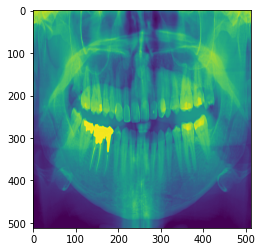

In [ ]:
#Checking data X  and Y matching
plt.imshow(x_train[random_number,:,:,0])

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
i= 0
for img in

SyntaxError: ignored

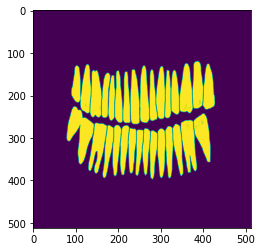

In [ ]:
#Checking data X  and Y matching
plt.imshow(y_train[random_number,:,:,0])

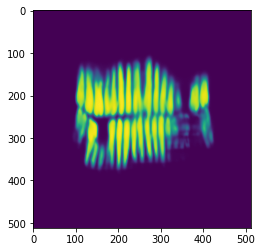

In [ ]:
predict_img=model.predict(x_test)
##model.save(path)
predict=predict_img[1,:,:,0] 
plt.imshow(predict)

In [ ]:
from model import *
model=UNET(input_shape=(512,512,1),last_activation='sigmoid')
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 512, 512, 32  320         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 dropout (Dropout)              (None, 512, 512, 32  0           ['conv2d[0][0]']                 
                                )                                                             

In [ ]:
model.compile(optimizer ='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
## optimizer = adam -module that contains back propagation to trrain our model
## loss = binary_crossentropy -binary classification (teeth or not teeth)
#Your choice batch and epoch 
model.fit(x_train,y_train,batch_size=8,epochs=10,verbose=1)

Epoch 1/10
66/66 [==============================] - 2267s 34s/step - loss: 0.3868 - accuracy: 0.7799
Epoch 2/10
66/66 [==============================] - 2321s 35s/step - loss: 0.2870 - accuracy: 0.8250
Epoch 3/10
66/66 [==============================] - 2318s 35s/step - loss: 0.2149 - accuracy: 0.8596
Epoch 4/10
66/66 [==============================] - 2333s 35s/step - loss: 0.1903 - accuracy: 0.8699
Epoch 5/10
44/66 [===================>..........] - ETA: 12:56 - loss: 0.1852 - accuracy: 0.8707

In [ ]:
predict_img=model.predict(x_test)
model.save(path)
predict=predict_img[1,:,:,0] 

INFO:tensorflow:Assets written to: /content/Data/assets


In [ ]:
#Example Test
from sklearn.metrics import f1_score
import numpy as np
predict_img=(predict_img>0.25)*1 #setting treshold value. Anyting aboe 0.25 for the pixle to called as teeth
y_test1=(y_test>0.25)*1

f1_score(predict_img.flatten(), y_test1.flatten(), average='micro')

0.9250377308238636

TypeError: ignored

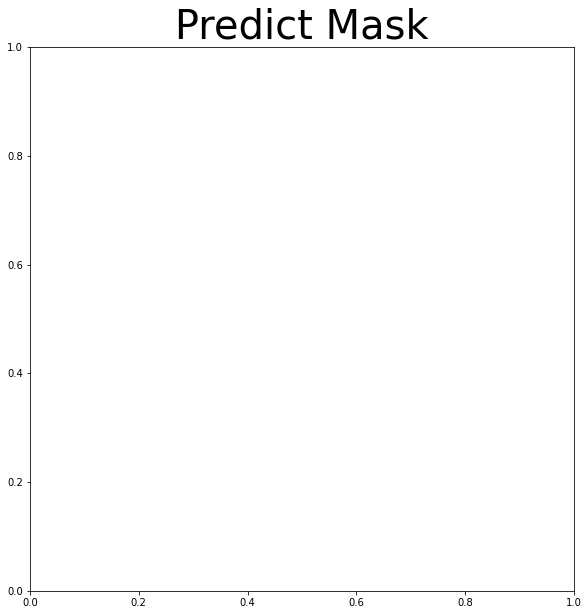

In [ ]:

plt.figure(figsize = (20,10))
plt.title("Predict Mask",fontsize = 40)
plt.imshow(predict)
#For CCA, we saved
plt.imsave("/content/predict.png",predict)

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
from CCA_Analysis import *


##Plotting - RESULT Example
img=cv2.imread("/content/Data/Images/82.png")#original img 107.png 

predict1 = cv2.resize(predict, (img.shape[1],img.shape[0]), interpolation=cv2.INTER_LANCZOS4)

mask=np.uint8(predict1*255)# 
_, mask = cv2.threshold(mask, thresh=255/2, maxval=255, type=cv2.THRESH_BINARY)
cnts,hieararch=cv2.findContours(mask,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
img = cv2.drawContours(img[:,:,0], cnts, -1, (255, 0, 0) , 2)
img = cv2.UMat.get(img)
cv2_imshow(img)

error: ignored

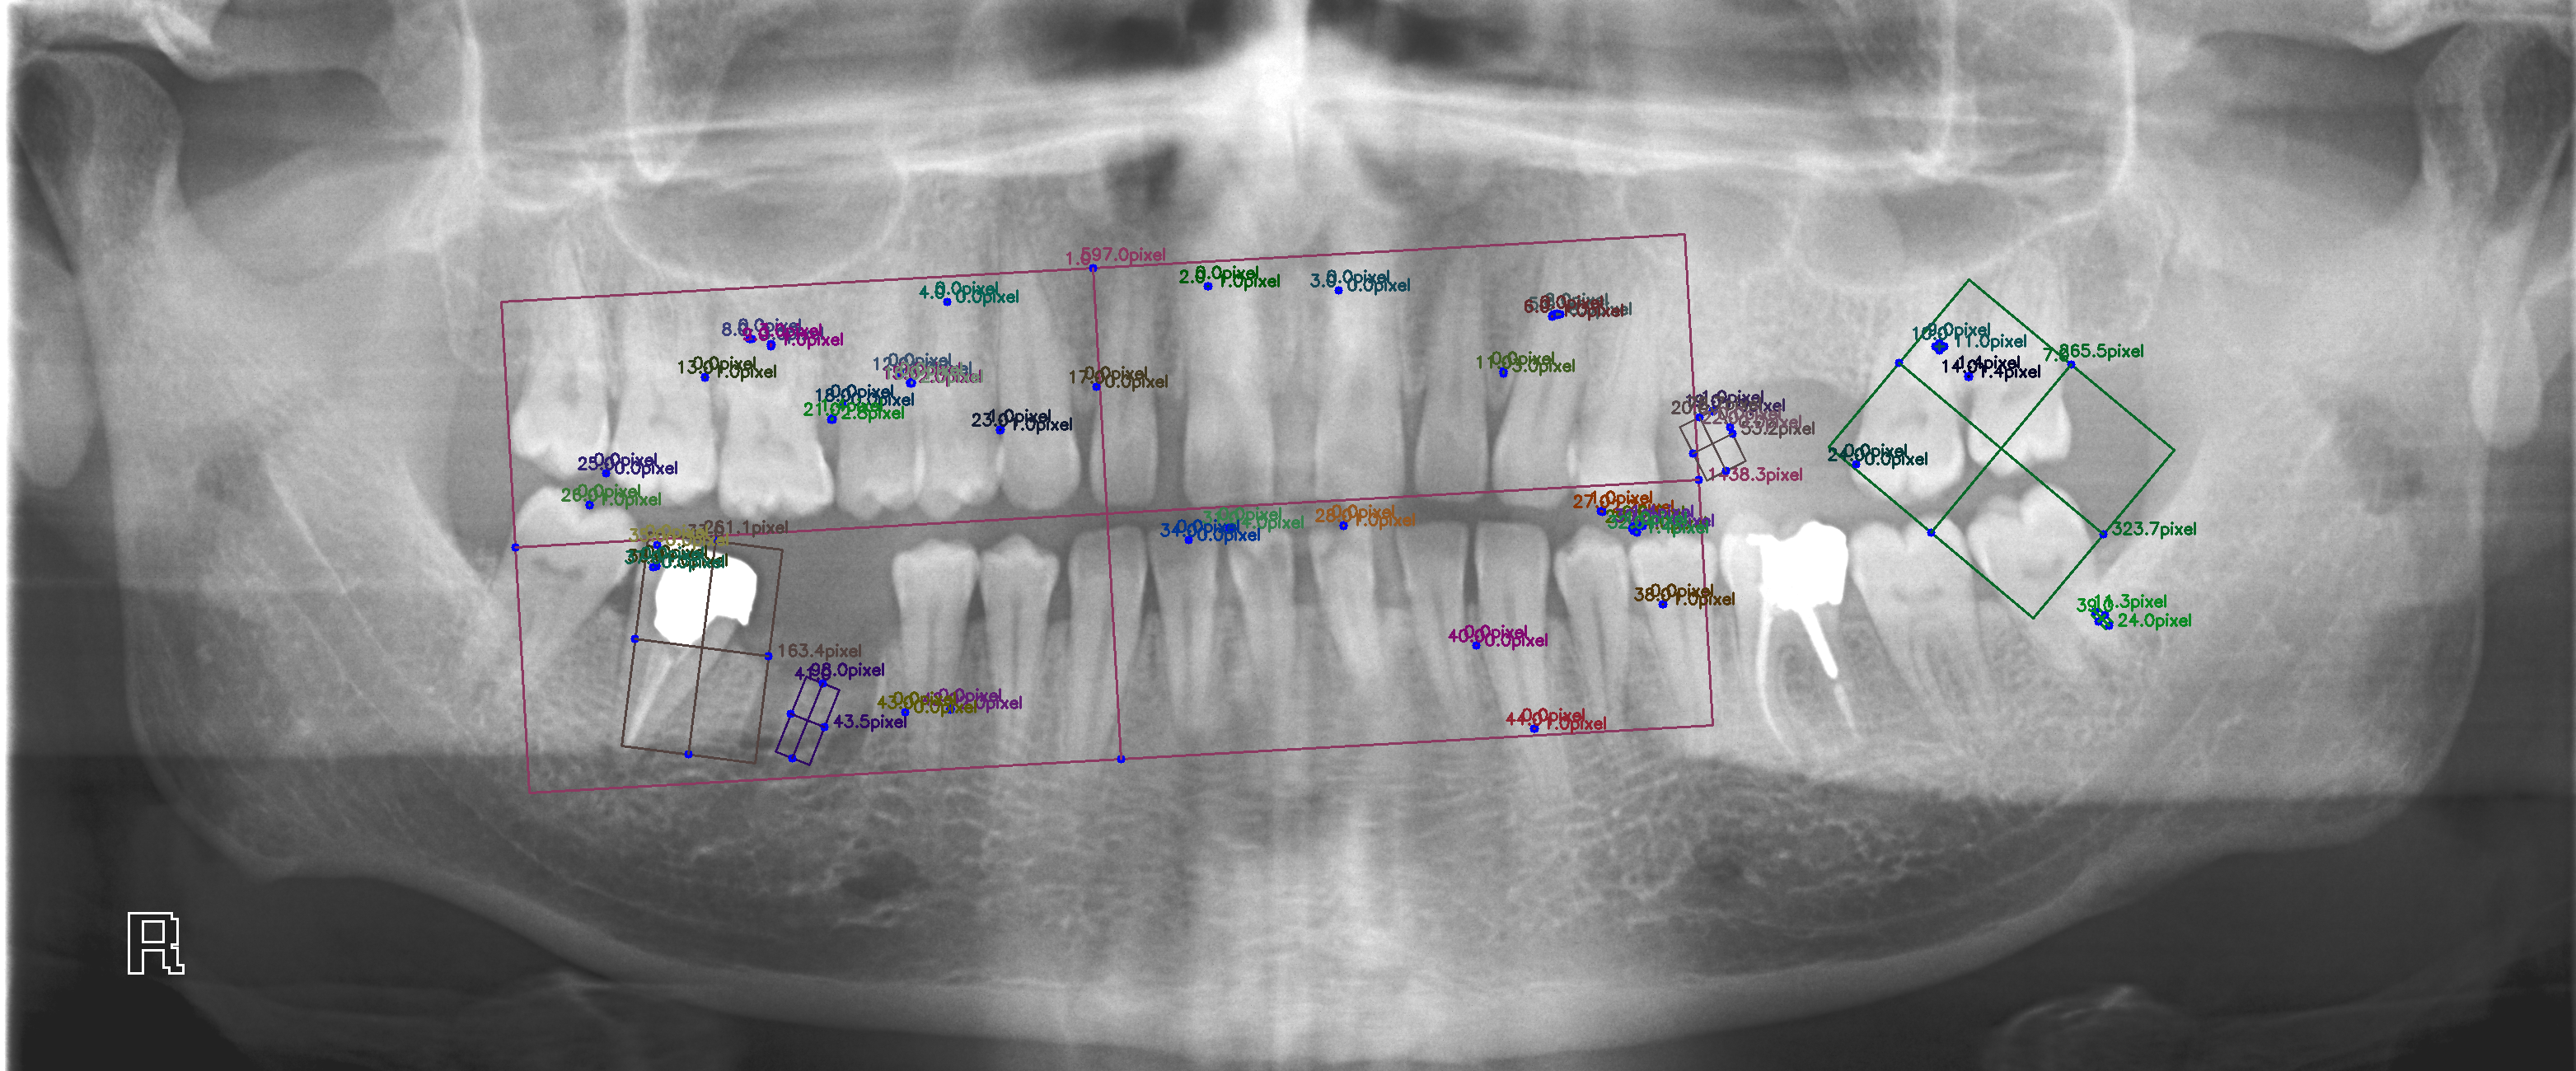

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
from CCA_Analysis import *


##Plotting - RESULT Example with CCA_Analysis
img=cv2.imread("/content/Data/Images/107.png")#original img 107.png 

#load image (mask was saved by matplotlib.pyplot) 
predicted=cv2.imread("/content/predict.png")

predicted = cv2.resize(predicted, (img.shape[1],img.shape[0]), interpolation=cv2.INTER_LANCZOS4)

cca_result,teeth_count=CCA_Analysis(img,predicted,3,2)
cv2_imshow(cca_result)

In [ ]:
print(teeth_count,"Teeth Count")

5 Teeth Count


In [ ]:
import tensorflow as tf
tf.keras.models.save_model(model, '/content/drive/MyDrive/dental_xray_seg.h5')